
![Logo_Hadrian_defaut.png](attachment:Logo_Hadrian_defaut.png)

![generali-fit-250x200-90.jpg](attachment:generali-fit-250x200-90.jpg)

# Life Insurance usecase

# Review of Python Functions for Machine Learning and Model Selection  <a href="https://www.python.org/"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 120px; display: inline" alt="Python"/></a> Predict the "Response" variable for each Id.

## Introduction
### Data

Num| Name |	Values
-|--|--|--
1|`Id`|	int
2|	`Product_Info_1`|	real
3|	`Product_Info_2`|	'D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3','A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'
4|	`Product_Info_3`|	integer
5|	`Product_Info_4`|	real
6|	`Product_Info_5`|	integer 2, 3
7|	`Product_Info_6`|	integer 1, 3
8|	`Product_Info_7`|	integer 1, 2, 3
9|	`Ins_Age`|	real
10|	`Ht`|	real
11|	`Wt`|	real  
12|	`BMI`|	real
-|--|--|--
13|	`Medical_Keyword_`|	int 1/0
14|	`Response`|	integer 1 -> 8


## 1 Data Preparation
### 1.1 Lecture  

Load the [data] in the current path (`path=""`) or directly execute the cell.

In [1]:
import sklearn
print(sklearn.__version__)

0.19.0


In [2]:
%matplotlib inline
# Importations 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np

path=""
TabTrain=pd.read_csv(path+'trainCourseWed_Sat.csv',index_col=0)
TabTest=pd.read_csv(path+'testCourseWed_Sat.csv',index_col=0)
TabTrain.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Response
0,0.0,4.514923,0.271576,0.0,2.747143,0.0,3.332864,4.163054,2.518814,2.853852,...,0.0,0.0,0.0,0.0,3.2421,0.0,0.0,0.000000,0.0,0.0
1,0.0,4.514923,0.814729,0.0,2.747143,0.0,1.287698,4.407940,2.332235,2.456277,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,2.581342,0.0,1.0
2,0.0,4.514923,0.271576,0.0,2.747143,0.0,2.120914,3.673283,0.699670,0.769136,...,0.0,0.0,0.0,0.0,3.2421,0.0,0.0,0.000000,0.0,1.0
3,0.0,4.514923,0.814729,0.0,2.747143,0.0,0.681722,4.163054,1.282729,1.289217,...,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,2.581342,0.0,1.0
4,0.0,4.514923,0.271576,0.0,2.747143,0.0,2.045167,5.142597,1.515953,1.090129,...,0.0,0.0,0.0,0.0,3.2421,0.0,0.0,0.000000,0.0,0.0


In [3]:
X_train2 = TabTrain.drop(['Response'],axis=1).values
X_test2 = TabTest.drop(['Response'],axis=1).values
Y_train = TabTrain['Response'].values
Y_test = TabTest['Response'].values
Labels = TabTrain.columns[:-1].tolist()

## 2. Modelling and Parameters Tuning

Here are some principles to systematically select final models. The lessons learnt are :

- Choose a good error metric

- Always do **cross-validation** to get a reliable metric. If you don’t, the validation score you get on a single validation set is unlikely to reflect the model performance in general. Then, you will likely see a model improvement in that single validation set, but actually performs worse in general. Keep in mind the CV score can be optimistic, but your model is still overfitting.

- **Trust your CV score**, and not LB score. The leaderboard score is scored only on a small percentage of the full test set. In some cases, it’s only a few hundred test cases. Your cross-validation score will be much more reliable in general.

- If your CV score is not stable (perhaps due to ensembling methods), you can **run your CV with more folds and multiple times** to take average.

- If a single CV run is very slow, **use a subset of the data to run the CV**. This will help your CV loop to run faster. Of course, the subset should not be too small or else the CV score will not be representative.

- **IN CASE OF SMALL DATASETS, DON'T PERFORM CV**, AS IT WOULD IMPROVE THE VARIANCE OF THE ESTIMATOR OF THE ERROR IN THE TEST SAMPLE; PREFER SOME MONTE-CARLO BOOTSTRAP TO REDUCE THE VARIANCE; KEEP A LARGE TRAINING SET TO REDUCE THE BIAS ON THE MODEL ESTIMATION;

- **FOR LARGE DATASETS, PREFER A CROSS-VALIDATION**, AS THERE WOULD BE LESS VARIANCE ISSUES IN THE TEST SAMPLE; TO REDUCE THE BIAS, KEEP A LARGE TRAINING SET.

- **For the final 2 models, pick very different models**. Picking two very similar solutions means that your solutions either fail together or win together, effectively meaning that you only pick one model. You should reduce your risk by picking two confident but very different models. You should not depend on the leaderboard score at all.

- Try to group your solutions by methodologies. Then, pick the best CV score model from each group. Then compare these best candidates of each group, pick two.

**Example**: 
I have different groups 1) Bagging of SVMs 2) RandomForest 3) Neural Networks 4) LinearModels. Then, each group should produce one single best model, then you pick 2 out of these.

- Pick a robust methodology.

**NB** :
Here we have a binary Output (1 0); We could use one of these metrics to evaluate the models :

- mean squared error (MSE)
- error classification
- AUC (area under the curve)

We choose AUC

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score

In [5]:
def PrintErrorsAndR2(prev,Y_test):
    """
    Print the Mean squared error and the R2 statistic
    """
    prev = np.round(prev)
    print("MSE=",mean_squared_error(prev,Y_test))
    print("R2=",r2_score(Y_test,prev))

In [6]:
def PrintAUCScore(proba,Y_test):
    """
    Print the AUC error
    """
    print("AUC=",roc_auc_score(Y_test,proba))


In [7]:
def PlotOOBError(paramName,algOpt):
    ## Function that plots the validation error curve over the parameters of Grid Search

    Results = algOpt.cv_results_

    ListGridParams = Results['param_' + paramName].data
    ListTestSplit = [testsplit for testsplit in Results.keys() if 'split' in testsplit and 'test' in testsplit]

    TabTestScores = [Results[testscores] for testscores in ListTestSplit]
    TabTestScores = np.vstack(TabTestScores)
    TabTestScores = np.mean(1-TabTestScores,axis=0)

    TabTestScores = pd.Series(TabTestScores,name = 'Out Of Bag Error', index = ListGridParams)
    TabTestScores.index.name = 'Grid_' +paramName
    TabTestScores.sort_index(inplace=True)
    TabTestScores.plot(title = 'Out ot Bag Error', figsize=(12,6), kind='line')

### 2.1 Linear Models

#### LASSO Regression

The **Lasso** is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent.

#### Formulation
$$\beta Opt =  arg\min_{\beta}||X\beta - y||_{2}^2 + \alpha||\beta||_{1} $$
The lasso estimate thus solves the minimization of the least-squares penalty with $\alpha$ $||w||_{1}$ added, where $\alpha$ is a constant and $||w||_{1}$ is the $L_{1}$-norm of the parameter vector.


In [8]:
from sklearn import linear_model
regLasso = linear_model.Lasso()
regLasso = regLasso.fit(X_train2,Y_train)
prev=regLasso.predict(X_test2)

In [9]:
PrintErrorsAndR2(prev,Y_test)

MSE= 0.242
R2= -0.31926121372


In [10]:
PrintAUCScore(prev,Y_test)

AUC= 0.5


$\alpha $ **Optimization**

The regularization parameter $\alpha$ is tuned using cross validation.


In [139]:
from sklearn.model_selection import GridSearchCV

#  Alpha Parameter Grid
param=[{"alpha":[0.01,0.02,0.05,0.1,0.2,0.3,0.4,0.5,1]}]

regLasso = GridSearchCV(linear_model.Lasso(), param,scoring = 'mean_squared_error',cv=5,n_jobs=-2)
regLassoOpt=regLasso.fit(X_train2, Y_train)

# Optimal parameter
regLassoOpt.best_params_["alpha"]
print("Best R2 = %f, Best parameter = %s" % (regLassOpt.best_score_,regLassOpt.best_params_))

Best R2 = -0.146912, Best parameter = {'alpha': 0.01}


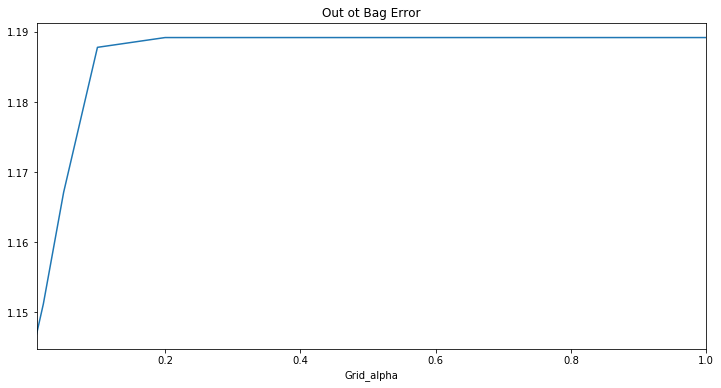

In [140]:
## Function that plots the validation error curve over the parameters of Grid Search
paramName = 'alpha'
PlotOOBError(paramName,regLassOpt)

In [141]:
prevRaw=regLassOpt.predict(X_test2)
prev = np.round(prevRaw)

In [142]:
PrintErrorsAndR2(prev,Y_test)

MSE= 0.198
R2= -0.0793955384984


In [143]:
PrintAUCScore(prevRaw,Y_test)

AUC= 0.773850280207


The following graph enables to identify good and bad predictions.

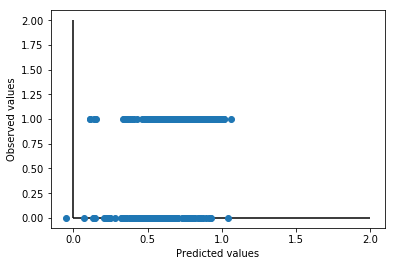

In [144]:
plt.plot(prevRaw,Y_test,"o")
plt.xlabel(u"Predicted values")
plt.ylabel(u"Observed values")
plt.hlines(0,0,2)
plt.vlines(0,0,2)
plt.show()

In [18]:
# Confusion Matrix
table=pd.crosstab(np.round(prev),Y_test)
print(table)

col_0  0.0  1.0
row_0          
0.0     43   21
1.0     78  358


*Scikit-learn* has other regularization parameter optimization processes; `lassoCV` uses a *coordinate descent* algorithm, without derivative computation as the *l1* norm is not differentiable, whereas `lassoLarsCV` is based on *least angle regression*. Here is an example on `lassoCV`.

** Exercice ** :
Execute 10-folds LassoCV then 10-folds LassoLarsCV, grid searching on 7 values of $\alpha$ between 0.01 and 1.0. Use an AUC scoring.
Compare the results on X_test. Which one is the best?

In [46]:
from sklearn.linear_model import LassoCV, LassoLarsCV

In [47]:
def ComputeLASSOLARSCVandLASSOCV(X_train,Y_train,X_test):
    """
    Computes LASSOCV and LASSOLARSCV models on X_train and Y_train, then predicts on X_test
    
    Arguments:
    X_train -- training set
    Y_train -- output vector
    X_test -- test set
    
    Returns:
    predLASSO -- LASSO prediction
    predLASSOLARS -- LASSOLARS prediction
    
    """
    
    ####################### YOUR CODE ############################
    alphas = [0.01, 0.05, 0.1, 0.2, 0.5, 1.0]
    model = LassoCV(alphas=alphas, n_alphas=7, cv=10).fit(X_train, Y_train)
    modelLARS = LassoLarsCV(cv=10).fit(X_train, Y_train)
    predLASSO = model.predict(X_test)
    predLASSOLARS = modelLARS.predict(X_test)
    ############################ END OF THE CODE ##########################
    
    return model, modelLARS, predLASSO, predLASSOLARS


In [48]:
model, modelLARS, predLASSO, predLASSOLARS = ComputeLASSOLARSCVandLASSOCV(X_train2,Y_train,X_test2)

In [49]:
print('Results for LASSOCV :')
PrintErrorsAndR2(predLASSO,Y_test)
print
print('Results for LASSOLARSCV :')
PrintErrorsAndR2(predLASSOLARS,Y_test)

Results for LASSOCV :
MSE= 0.198
R2= -0.0793955384984
Results for LASSOLARSCV :
MSE= 0.218
R2= -0.188425390872


### 2.2. GLM : Logistic Regression

That old method is still used very often. First because we are used to, but also for its efficiency in processing big datasets, like in Criteo or CDiscount.


The process of model selection is done by penalty : **Ridge** (**L2-norm**), or **Lasso** (**L1-norm**). We want to choose one of these regularizations, the same way we did before on the LASSO model.

Here, again, we have to find the optimal **C** for regularization.

#### L1 OPTIMIZATION

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# Param Grids
param=[{"C":[0.01,0.05,0.1,0.5,1,5,10]}]
logitL = GridSearchCV(LogisticRegression(penalty="l1"), param, scoring='f1_weighted',cv=5,n_jobs=-3)
logitLasso=logitL.fit(X_train2, Y_train)

# Optimal Parameter
logitLasso.best_params_["C"]
print("Best score = %f, Best parameter = %s" %
      (1.-logitLasso.best_score_,logitLasso.best_params_))

Best score = 0.222153, Best parameter = {'C': 10}


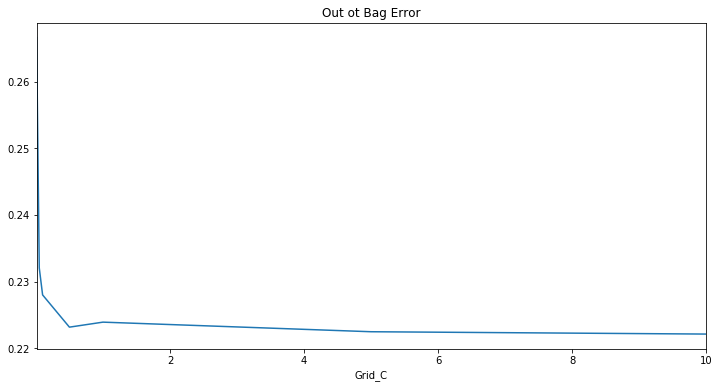

In [52]:
paramName = 'C'
PlotOOBError(paramName,logitLasso)

In [53]:
from sklearn.metrics import confusion_matrix

In [56]:
# Prediction
Y_chap = logitLasso.predict(X_test2)
# Confusion matrix
table=pd.crosstab(Y_chap,Y_test)
#print(table)
print(confusion_matrix(Y_chap, Y_test))
# Error on test sample
print("Error on test LASSO logistic regression = %f" % (1-logitLasso.score(X_test2, Y_test)))

[[ 58  52]
 [ 63 327]]
Error on test LASSO logistic regression = 0.233831


#### L2 OPTIMIZATION 

In [63]:
# Param Grids
param=[{"C":[0.01,0.05,0.1,0.5,1,5,10,20]}]
logitR = GridSearchCV(LogisticRegression(penalty="l2"), param, scoring='f1_weighted', cv=5,n_jobs=-3)
logitRidge=logitR.fit(X_train2, Y_train) 

# Optimal Parameter
logitRidge.best_params_["C"]
print("Best score = %f, Best parameter = %s" % (1.-logitRidge.best_score_,logitRidge.best_params_))

Best score = 0.221351, Best parameter = {'C': 20}


In [64]:
# Prediction
Y_chap = logitRidge.predict(X_test2)
# Confusion matrix
table=pd.crosstab(Y_chap,Y_test)
print(table)
# Error on test sample
print("Error on test RIDGE logistic regression = %f" % (1-logitRidge.score(X_test2, Y_test)))

col_0  0.0  1.0
row_0          
0.0     59   55
1.0     62  324
Error on test RIDGE logistic regression = 0.236415


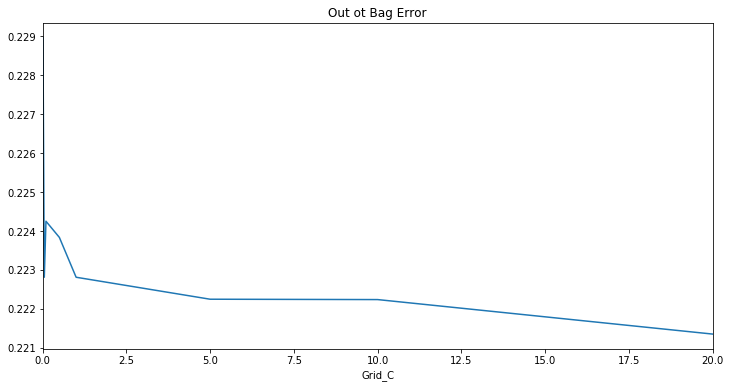

In [65]:
paramName = 'C'
PlotOOBError(paramName,logitRidge)

** Exercice ** : Implement the code below that chooses the optimal penalty between L1 and L2, and the optimal C, by cross-validation (GridSearchCV).

In [80]:
def ChooseBestLogisticRegularizer(X_train,Y_train):
    
    ## Param Grid
    ############## ENTER THE CODE ##################
    params = {
            'penalty':['l1', 'l2'],
            'C':[0.01,0.05,0.1,0.5,1,5,10,20]
    }
    ############## END OF THE CODE ###################
    
    ## GridSearch
    ############## ENTER THE CODE ##################
    logit = GridSearchCV(LogisticRegression(), param_grid=params, scoring="f1_weighted", cv=5, n_jobs=-1)
    logitOpt = logit.fit(X_train, Y_train)
    ############## END OF THE CODE ###################
    
    # Optimal Parameter
    penaltyOpt = logitOpt.best_params_["penalty"]
    COpt = logitOpt.best_params_["C"]
    return logitOpt, penaltyOpt, COpt

In [81]:
logitOpt, penaltyOpt, COpt = ChooseBestLogisticRegularizer(X_train2,Y_train)

In [82]:
print("Best Penalty for Logistic Regression here : ")
print(penaltyOpt)
print("Best regularizer C for Logistic Regression here : ")
print(COpt)

Best Penalty for Logistic Regression here : 
l2
Best regularizer C for Logistic Regression here : 
20


Now that we have our optimal logistic regression model, let's take a look at some other.

### 2.2 Supervised K Nearest Neighbors

The **k-nearest neighbors algorithm** (**k-NN**) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression.

- In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

- In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.


Here is a case of application of discriminant analysis (http://scikit-learn.org/stable/modules/neighbors.html) 

The complexity parameter is optimized on a predefined grid by minimizing the cross validation error; scikit-learn proposes many cross-validation options.

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train2, Y_train)
prevKNN = knn.predict(X_test2)
PrintErrorsAndR2(prevKNN,Y_test)

MSE= 0.264
R2= -0.439194051331


** Exercice ** :
Execute 5-folds GridSearch on KNeighborsClassifier, grid searching on 15 values of *n_neighbors* between 1 and 15.
Print the best parameter.

In [97]:
def GridSearchKNN(X_train,Y_train):
    """
    Grid search method to find optimal k for knn classification
    
    Arguments:
    X_train -- training set
    Y_train -- output vector
    
    Returns:
    knnOpt -- trained GridSearch for KNeighborsClassifier model on 15 values of n_neighbors between 1 and 15
    bestScore -- best prediction score
    bestParam -- optimal number of neighbors
    
    """
    
    # Tuning k
    # Parameters Grid
    param_grid=[{"n_neighbors":list(range(1,14))}]
    
    knnOpt = None
    ## GridSearch fitting on KNeighbors Classifier
    ############################### START YOUR CODE HERE ###############################
    knnCV = GridSearchCV(knn, param_grid=param_grid, cv=5, scoring="f1_weighted", n_jobs=-1)
    knnOpt = knnCV.fit(X_train, Y_train)
    ############################### END OF THE CODE ###############################
    
    # Optimal parameter
    ## Get the best score and the best parameters
    ############################### START YOUR CODE HERE ###############################
    bestScore = knnOpt.best_score_
    bestParam = knnOpt.best_params_
    ############################### END OF THE CODE ###############################
    print("Best score = %f, Best parameter = %s" % (bestScore,bestParam))
    
    return knnOpt, bestScore, bestParam

In [93]:
knnOpt, bestScore, bestParam = GridSearchKNN(X_train2,Y_train)

Best score = 0.727403, Best parameter = {'n_neighbors': 6}


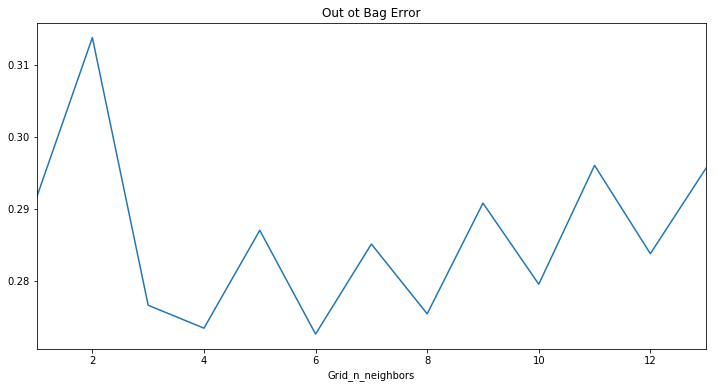

In [94]:
paramName = 'n_neighbors'
PlotOOBError(paramName,knnOpt)

**Exercice** :
If k >= 13, relaunch the GridSearch for higher parameters in the grid.

In [95]:
# Prediction
y_chap = knnOpt.predict(X_test2)
y_chapC = np.round(y_chap)
# Confusion matrix
table=pd.crosstab(y_chapC,Y_test)
print(table)

col_0  0.0  1.0
row_0          
0.0     31   48
1.0     90  331


In [96]:
PrintErrorsAndR2(y_chap,Y_test)

MSE= 0.276
R2= -0.504611962755


### 2.3. Classification Tree

The decision trees(http://scikit-learn.org/stable/modules/tree.html) are implemented in *scikit-learn* but is insufficient on pruning methods. It is not a *complexity* *penalization*, so instead of tuning the number of leaves, it tunes the global tree depth, at the risk of pruning, at a given depth, important leaves or keeping ambiguous leaves.

In [98]:
from sklearn.tree import DecisionTreeClassifier

In [99]:
tree = DecisionTreeClassifier()
tree.fit(X_train2,Y_train)
prevtree = tree.predict(X_test2)
PrintErrorsAndR2(prevtree,Y_test)

MSE= 0.296
R2= -0.613641815129


** We execute 10-folds GridSearch on DecisionTreeClassifier, grid searching on each value of *max_depth* between 2 and 20. **

** We Print the best parameter. **

In [100]:
def GridSearchDecisionTree(X_train,Y_train):
    """
    Grid search method to find optimal tree depth for decision tree
    
    Arguments:
    X_train -- training set
    Y_train -- output vector
    
    Returns:
    treeOpt -- trained GridSearch for DecisionTreeClassifier model on each value of *max_depth* between 2 and 20
    bestScore -- best prediction score
    bestParam -- optimal depth of tree
    
    """
    
    param=[]
    param=[{"max_depth":list(range(2,21))}]
    
    treeOpt = None
    tree = GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-2)
    treeOpt=tree.fit(X_train, Y_train)
    
    # Optimal parameter
    bestScore = treeOpt.best_score_
    bestParam = treeOpt.best_params_
    print("Best score = %f, Best parameter = %s" % (bestScore,bestParam))
    
    return treeOpt, bestScore, bestParam

In [101]:
treeOpt, bestScore, bestParam = GridSearchDecisionTree(X_train2,Y_train)

Best score = 0.816293, Best parameter = {'max_depth': 6}


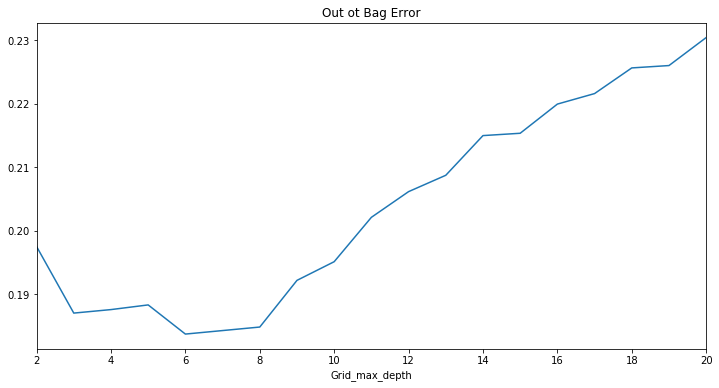

In [102]:
paramName = 'max_depth'
PlotOOBError(paramName,treeOpt)

In [103]:
# Error on Test sample
1-treeOpt.score(X_test2,Y_test)

0.19599999999999995

In [104]:
# Prediction
y_chap = treeOpt.predict(X_test2)
y_chap = np.round(y_chap)
# Confusion matrix
table=pd.crosstab(y_chap,Y_test)
print(table)

col_0  0.0  1.0
row_0          
0.0     65   42
1.0     56  337


### 2.5 Support Vector Machine

Given training vectors x_i \in $\mathbb{R}^p$, i=1,…, n, in two classes, and a vector $y \in \{1, -1\}^n$, SVC solves the following primal problem :
$$ \min_{w,b,\zeta} \frac{1}{2}w^Tw + C\sum\limits_{i=1}^{n}\zeta_{i} $$

$$ \text{subject to } y_{i}(w^T\phi(x_{i}) + b) >= 1 - \zeta_{i} $$

$$ \zeta_{i}>=0, i=1,...,n $$

Its dual is

$$ \min_{\alpha}\frac{1}{2}\alpha^TQ\alpha - e^T\alpha $$

$$ \text{subject to } y^T\alpha = 0 $$

$$ 0 <= \alpha_{i} <= C, i=1,...,n $$

where $e$ is the vector of all ones, $C > 0$ is the upper bound, Q is a n yb n semi definite positive matrix such that $Q_{ij} = y_{i}y_{j}K(x_{i},x_{j})$ and $K(x_{i},x_{j})$ is the kernel function.

The decision function is :

$$ sign(\sum\limits_{i=1}^{n}y_{i}\alpha_{i}K(x_{i},x) + \rho) $$

Many parameters for that method.

**Exercice** :

Here, we would use a non-linear kernel function, like the **radial basis function** (rbf), very useful in case of non linearly separable labels.

*rbf*
: $\exp(-\gamma \|x-x'\|^2)$. $\gamma$ is specified by keyword **gamma**, must be greater than 0.

**Tune the *C* parameter using cross-validation and tune the coefficient *gamma* for the  gaussian kernel ("standard deviation").**
The parameter *C*, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low *C* makes the decision surface smooth, while a high *C* aims at classifying all training examples correctly. *gamma* defines how much influence a single training example has. The larger *gamma* is, the closer other examples must be to be affected. Gamma must be inferior to 5 in order not to overfit on classes. 



In [105]:
from sklearn.svm import SVC

In [120]:
def GridSearchSVMClassifier(X_train,Y_train):
    """
    Grid search method to find optimal C and gamma  for SVC
    
    Arguments:
    X_train -- training set
    Y_train -- output vector
    
    Returns:
    svmOpt -- trained GridSearch for SVC model on a grid of *C* and *gamma*
    bestScore -- best prediction score
    bestParam -- optimal maximum number of features
    
    """
    
    # Tuning max_features
    param=None
    ###### START YOUR CODE HERE ######
    params = {
            'gamma':[0.01,0.1,0.5,1,3],
            'C':[0.01,0.05,0.1,0.5,1,5,10,20]
    }
    ###### END OF THE CODE ######
    
    svmOpt = None
    ###### START YOUR CODE HERE ######
    svmCV = GridSearchCV(SVC(kernel="rbf"), param_grid=params, cv=5, scoring="f1_weighted", n_jobs=-1)
    svmOpt = svmCV.fit(X_train, Y_train)
    ###### END OF THE CODE ######
    
    # Optimal parameter
    ###### START YOUR CODE HERE ######
    bestScore = svmOpt.best_score_
    bestParam = svmOpt.best_params_
    ###### END OF THE CODE ######
    print("Best score = %f, Best parameter = %s" % (bestScore,bestParam))
    
    return svmOpt, bestScore, bestParam

In [121]:
svmOpt, bestScore, bestParam = GridSearchSVMClassifier(X_train2,Y_train)

Best score = 0.754957, Best parameter = {'C': 5, 'gamma': 0.01}


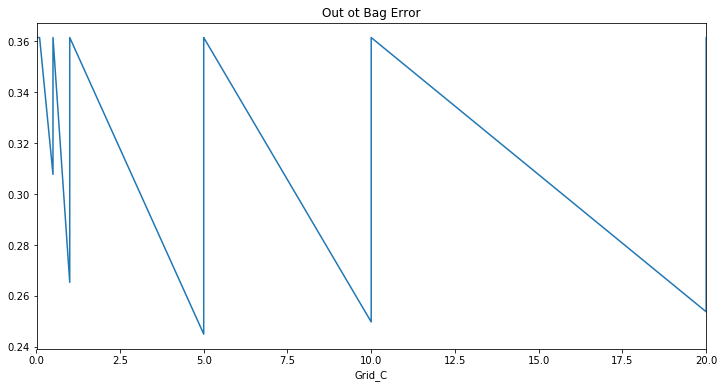

In [122]:
paramName = 'C'
PlotOOBError(paramName,svmOpt)

In [123]:
# Error on Test sample
1-svmOpt.score(X_test2,Y_test)

0.24561826869731729

In [124]:
# Predicting
y_chap = svmOpt.predict(X_test2)
# Confusion matrix
table=pd.crosstab(y_chap,Y_test)
print(table)

col_0  0.0  1.0
row_0          
0.0     48   44
1.0     73  335


### 2.6 Random Forests

The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set $X = x_{1}, ..., x_{n}$ with responses $Y = y_{1}, ..., y_{n}$, bagging repeatedly (B times) selects a random sample with replacement of the training set and fits trees to these samples:

$\text{For } b = 1, ..., B:$

$\text{     Sample, with replacement, n training examples from X, Y; call these } X_{b}, Y_{b}.$

$\text{     Train a classification or regression tree } f_{b} \text{on} X_{b}, Y_{b}.$

After training,

${ {\hat {f}}={\frac {1}{B}}\sum _{b=1}^{B}f_{b}(x')}$

Just like the boosting, two functions are suggested in [scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html); one for regression, one for classification, along with a more random version.

In [125]:
from sklearn.ensemble import RandomForestClassifier 

**Exercice** :
Execute 5-folds GridSearch on RandomForestClassifier, on 100 estimators, grid searching on each value of max_features between 2 and 20. Print the best parameter. **Make sure the model takes the unbalanced weights of class into account.**

Cross validation Optimization of the number of sampled features for each node.

In [127]:
def GridSearchSimpleRandomForestClassifier(X_train,Y_train):
    """
    Grid search method to find optimal maximum number of features for RandomForestClassifier
    
    Arguments:
    X_train -- training set
    Y_train -- output vector
    
    Returns:
    rfOpt -- trained GridSearch for RandomForestClassifier model on each value of *max_features* between 2 and 9
    bestScore -- best prediction score
    bestParam -- optimal maximum number of features
    
    """
    
    # Tuning max_features
    ############## START YOUR CODE HERE ##############
    params = [{
        "max_features": np.arange(2, 21)
    }]
    
    #################### END OF THE CODE ######
    
    rfOpt = None
    ###### START YOUR CODE HERE ######
    rfCV = GridSearchCV(RandomForestClassifier(n_estimators=100, oob_score=True),
                       param_grid=params,
                       cv=5,
                       scoring="f1_weighted",
                       n_jobs=-1)
    
    rfOpt = rfCV.fit(X_train, Y_train)
    ###### END OF THE CODE ######
    
    # Optimal parameter
    ###### START YOUR CODE HERE ######
    bestScore = rfOpt.best_score_
    bestParam = rfOpt.best_params_
    
    ###### END OF THE CODE ######
    print("Best score = %f, Best parameter = %s" % (bestScore,bestParam))
    
    return rfOpt, bestScore, bestParam

In [128]:
rfOpt, bestScore, bestParam = GridSearchSimpleRandomForestClassifier(X_train2,Y_train)

Best score = 0.807107, Best parameter = {'max_features': 15}


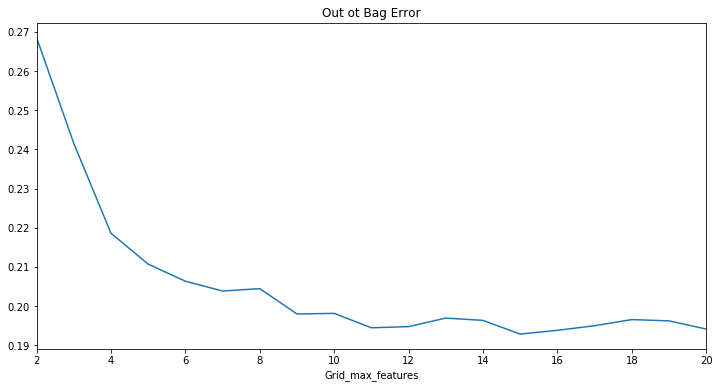

In [129]:
PlotOOBError('max_features',rfOpt)

In [130]:
# Error on Test sample
1-rfOpt.score(X_test2,Y_test)

0.20613696006129678

In [131]:
# Predicting
y_chap = rfOpt.predict(X_test2)
y_chap = np.round(y_chap)
# Confusion matrix
table=pd.crosstab(y_chap,Y_test)
print(table)

col_0  0.0  1.0
row_0          
0.0     57   34
1.0     64  345


We can compute a feature importance indicator in order to better interpret the results. The indicator depends on the feature position in the tree. The forest must be reestimated because the GridSearch doesn't recognize the *importance parameter*.

## 3. Synthesis : Comparison of methods

### 3.1 ROC Curves

In [146]:
from sklearn.metrics import roc_curve
listMethod=[['lasso',regLassoOpt],["RF",rfOpt],["Logit",logitOpt],["Tree",treeOpt],["K-nn",knnOpt]]

**Exercice** :
Plot the ROC curves for all the previous methods.

USE THE ROC_CURVE PACKAGE TO DO SO.


C:\Users\Bunten\AppData\Local\Continuum\Anaconda3\envs\hadrian-advisors\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


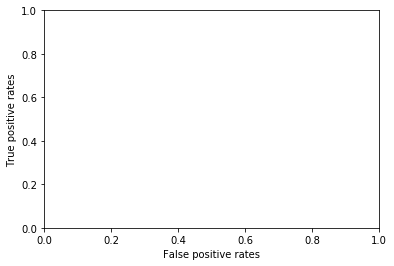

In [156]:
for method in enumerate(listMethod):
    ############## YOUR CODE #######################
    roc_curve(Y_test, method[1][1].predict(X_test2))  
    ############### END ###########################
plt.xlabel('False positive rates')
plt.ylabel('True positive rates')
plt.legend(loc="best")
plt.show()

**QUESTION :** Is the AUC criteria useful to sort the curves and the methods?

We must choose the best learning method using a false positive ratio.

### 3.2 Iteration on several samples (Monte Carlo)

If the test sample is of little size, the estimate of the prediction error may have a large variance. We can reduce it by computing a *Monte Carlo* method, picking several training-test couples to iterate the previous treatments. The data is normalized.

The code is compact and efficient because it is well parallelized by the used functions.

** Exercice ** :
Tune the code below, given the estimated optimal parameters we have got before, 

SAMPLING, SCALING (STANDARDSCALER LIBRARY), AND GRIDSEARCHING.
and complete the code by implementing sampling, scaling, and grisearching (5 k-folds).

**NB** : here, the validation set size for *gridsearch* will be of *20%* of the size of *X_train2*, to allow the model to be  as unbiased as possible.

**MOREOVER, BE SURE TO USE THE ADEQUATE SCORING PARAMETER IN THE GRIDSEARCH (F1 WEIGHTED)**

In [ ]:
from sklearn.utils import check_random_state
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time

In [ ]:
check_random_state(13)
tps0=time.clock()

# Definition of the estimators
logit= LogisticRegression(penalty="l2")
knn  = KNeighborsClassifier()
tree = DecisionTreeClassifier()
rf   = RandomForestClassifier(n_estimators=100,class_weight='balanced_subsample')

# Number of estimations
B=3

# Parameters Grid
listMethGrid=[[rf,{"max_features":list(range(15,30,2))}],
    [tree,{"max_depth":list(range(4,30))}],
    [knn,{"n_neighbors":list(range(10,40))}],
    [logit,{"C":[0.01,0.02,0.05,0.1,0.2,0.5,1,5]}]]

# Error Initialisation for each method (column) and each iteration (row)
arrayErreur=np.empty((B,4))
for i in range(B):   # iterations for B samples
    # Learning and Test Sampling, and scaling
    X_learn = []
    Y_learn = []
    X_val = []
    Y_val = []
    
    ########################### YOUR CODE (about 5 lines) ###########################
    
    ########################### END OF CODE ###########################
    
    
    # Optimization
    for j,(method, grid_list) in enumerate(listMethGrid):
        methodGrid = []
        methodOpt = []
        methFit = []
        
        
        ########################### YOUR CODE (approximately 3 lines) ###########################
        
        ########################### END OF CODE ###########################
        
        
        arrayErreur[i,j]=1-methFit.score(X_val,Y_val)
tps1=time.clock()
print("Elapsed time in minutes :",(tps1 - tps0)/60)    

In [ ]:
# Distribution of the Errors
dataframeErreur=pd.DataFrame(arrayErreur,columns=["RF","Tree","Knn","Logit"])
dataframeErreur[["RF","Tree","Knn","Logit"]].boxplot(return_type='dict')
plt.show()

In [ ]:
# Means
dataframeErreur.mean()

**Exercice** :
Add the gradient boosting model to the previous code. Which parameter, apart from the number of estimators, would you try to tune first?